In [426]:
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Parking data

In [427]:
zone1_j_df = pd.read_csv(os.path.join('data', 'parkings_JULIO', 'zone1.csv'), sep=';', parse_dates=['recvTime'], index_col='recvTime')
zone1_so_df = pd.read_csv(os.path.join('data', 'parkings_SEPT_OCT', 'zone1.csv'), sep=';', parse_dates=['recvTime'], index_col='recvTime')
zone1_df= pd.concat([zone1_j_df,zone1_so_df], axis=0)

In [428]:
zone1_df.shape

(926, 1)

In [429]:
target_days = zone1_df.index

## Human flows

In [430]:
def read_clean_subflows_fn(critera, time_period):
    subflows= {}
    for c in critera:
        df = pd.read_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_clean_{}.csv'.format(c, time_period)),
                       parse_dates=[0], index_col=0)
        subflows[c] = df
    return subflows

In [431]:
target_criteria = range(6,15)

In [432]:
mob_flows_jul = read_clean_subflows_fn(target_criteria, 'july')
mob_flows_sept = read_clean_subflows_fn(target_criteria, 'sept_oct')

In [433]:
mob_flows= {}
for c in target_criteria:
    mob_flows[c] = pd.concat([mob_flows_jul[c], mob_flows_sept[c]], axis=0)
    mob_flows[c] = mob_flows[c].loc[target_days]

### Plot with time series

In [434]:
def plot_global_plot_for_paper_fn(parking_data, subflows, subflows_labels, subflow_colors, img_id):
    
    ax= parking_data.plot(figsize=(20,5), label='Free places', color='blue')

    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('axes', 1.0))

    i= 0
    for sf in subflows:
        sf['n_viajes'].plot(ax=ax2, grid=True,label=subflows_labels[i],color=subflow_colors[i])
        i +=1

    ax.set_ylabel('Free places in parking', fontsize=20)
    ax.set_xlabel('Time (h)', fontsize=20)

    ax2.set_ylabel('Num of trips', fontsize=20);

    ax.yaxis.label.set_color('blue')
    ax2.yaxis.label.set_color('red')

    ax.tick_params(axis='y', colors='blue')
    ax2.tick_params(axis='y', colors='red')
    ax.legend(['Available spaces'])
    ax2.legend(['$\mathcal{I}^B$'])
    leg = ax.legend(loc='upper left', fontsize=15)#, bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=2)
    leg = ax2.legend(loc='upper left', fontsize=15, bbox_to_anchor=(0.0, 0.9), shadow=False, ncol=5)

    plt.tight_layout()
    plt.savefig(os.path.join('figs', 'parking_vs_subflow_{}.png'.format(img_id)))
    plt.show()

In [435]:
dfin= mob_flows[11].reset_index().drop(columns='recvTime')
dfin.shape

(926, 1)

In [436]:
z_df= zone1_df.reset_index().drop(columns='recvTime')
z_df.shape

(926, 1)

### Zone B

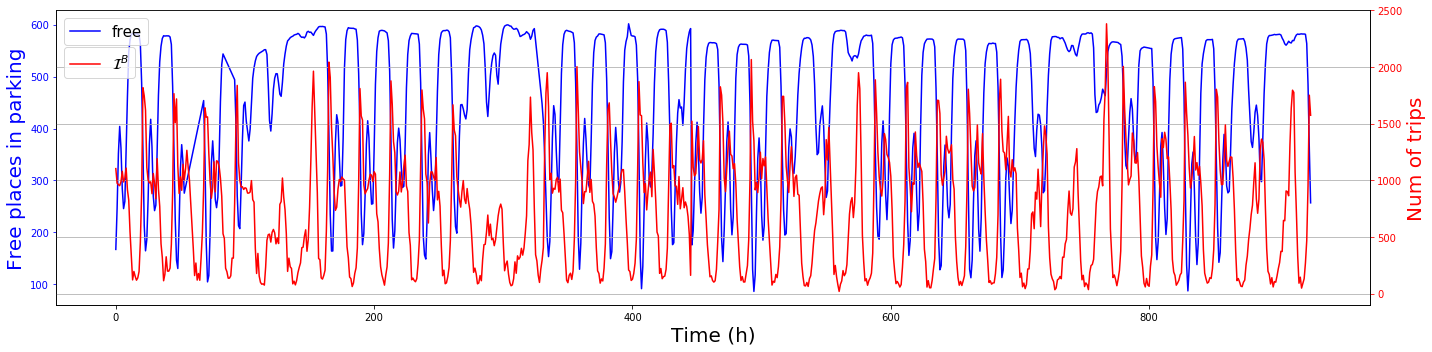

In [437]:
plot_global_plot_for_paper_fn(z_df, 
                              [dfin], 
                              ['$\mathcal{I}^B$'], 
                              ['red'], 
                              'area_B')

## Zone A (in)

In [438]:
dfin= mob_flows[9].reset_index().drop(columns='recvTime')
dfin.shape

(926, 1)

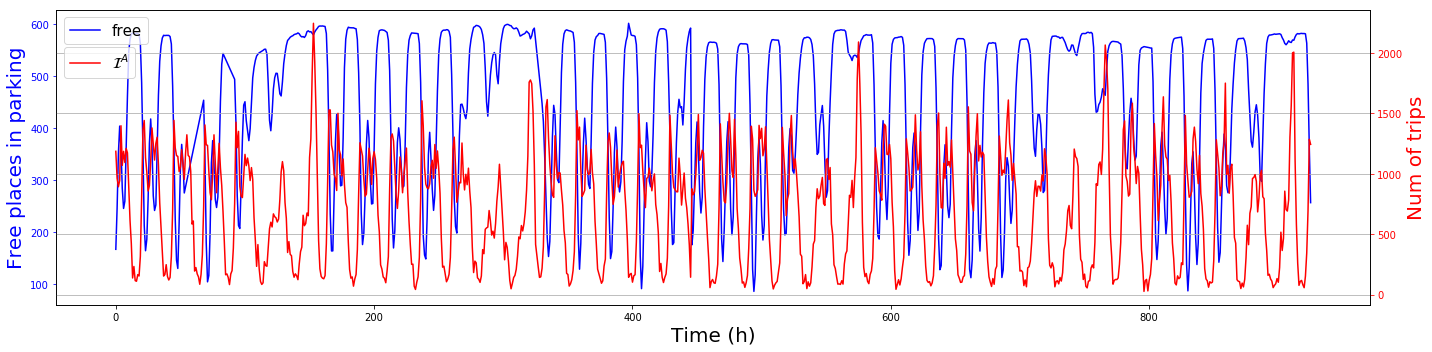

In [439]:
plot_global_plot_for_paper_fn(z_df, 
                              [dfin], 
                              ['$\mathcal{I}^A$'], 
                              ['red'], 
                              'area_A')